# #Simple Linear Regression

# Importing Libraries

In [25]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

# Loading the data

In [26]:
# Reading data from link
url = "http://bit.ly/w-data"
data= pd.read_csv(url)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Checking Missing values


In [27]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Checking any Categorical Data

In [28]:
data.dtypes=='Object'

Hours     False
Scores    False
dtype: bool

# description of data

In [7]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Analysis of given data

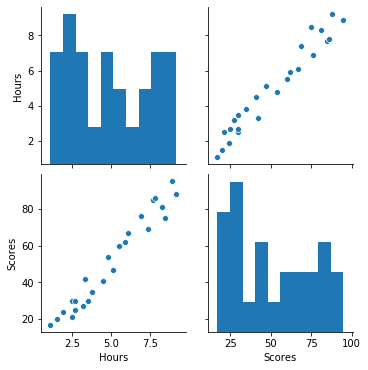

In [8]:
sns.pairplot(data)

# there is  No skewness is present as hours linearly correlated with scores from above analysis

# Preparing data

In [10]:

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


# training, testing and spliting the data

In [29]:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=1)

# # Modeling using linear regressor

In [30]:
from sklearn.linear_model import LinearRegression  
lr= LinearRegression()  
lr.fit(X_train, y_train) 
ypred=lr.predict(X_test)
print("Training of data set is completed.")

Training of data set is completed.


# visualization of training data set

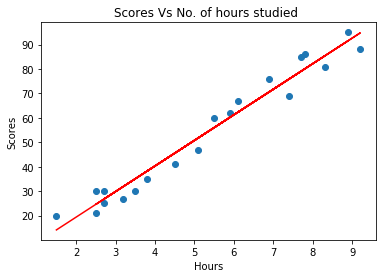

In [31]:
# Plotting for the train data
plt.scatter(X_train,y_train)
plt.title('Scores Vs No. of hours studied ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X_train, lr.predict(X_train),c='r');
plt.show()

# visualization of test data set

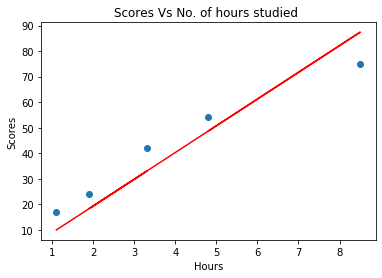

In [32]:
# Plotting for the test data
plt.scatter(X_test, y_test)
plt.title('Scores Vs No. of hours studied ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X_test,ypred,c='r');
plt.show()

# predictions

In [33]:
ypred=lr.predict(X_test)
Dict={'Hours':X_test.flatten(),'Actual Score':y_test,'Predicted Score':ypred.flatten()}
print(Dict)
df2=pd.DataFrame(data=Dict)

df2

{'Hours': array([1.1, 3.3, 1.9, 8.5, 4.8]), 'Actual Score': array([17, 42, 24, 75, 54], dtype=int64), 'Predicted Score': array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])}


,Hours,Actual Score,Predicted Score
0,1.1,17,9.970262
1,3.3,42,32.984700
2,1.9,24,18.339148
3,8.5,75,87.382463
4,4.8,54,48.676362


In [34]:
# test with own data set
hours = 9.25
own_pred =lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 95.22829438402952


# evaluation of model

In [35]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, ypred)) 
print('R2 sqaure :', r2_score(y_test, ypred))

Mean Absolute Error: 7.882398086270432
R2 sqaure : 0.8421031525243527


#  we got mean absolute error of  7.8823  from this trained simple regression model  